# Assignment 2
## Kunal Naidu
## 30020999


# Introduction

In this report we will be looking at Hamlet. We will be calculating the entropy of a simplified Hamlet text. Following that we will be calculating the probabilities of a monkey being able to type out Hamlet. We will be doing this calculation using two different assumptions. The first assumption there is a uniform random selection of keys and the second would be that the chance of hitting a key was the same as the distribution of hamlet. After we will see the joint probability of any two letter sequence. To end we will be writing a program which generates sequences of text which sound somewhat like shakespeare.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from decimal import *

First we will start by opening the Hamlet text. We also took into account if the file wasn't downloaded. If the file wasn't downloaded, the file was downloaded and opened.

In [2]:
filename= "Hamlet.txt"
try:
    file = open(filename, "r")
    print("File Found")
    print("Opening File")
except FileNotFoundError:
    print("File Not Found")
    print("Dowloading File")
    url = r'http://www.gutenberg.org/files/1524/1524-0.txt' 
    urllib.request.urlretrieve(url, r'./Hamlet.txt')
    #file = open(filename, "r")
    print("Opening File")
    

File Found
Opening File


After opening the file, we manually took out the metadata. For the rest of the values we made every letter lowercased and to make sure values are letters or spaces. We went through each value and found unique values and values which weren't unique were counted. 

In [3]:
with open('Hamlet.txt', 'r') as f2:
    data = f2.read()

Hamlet=data[858:178430]

charlist = [c.lower() for c in Hamlet if c.isalpha() or c==' ']

In [4]:
charlist= np.array(charlist)
unique, counts = np.unique(charlist, return_counts=True)

length_hamlet=len(charlist)

print(unique)
print(counts)

[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'à' 'æ']
[28928 10282  1822  2796  5133 15664  2734  2426  8699  8882   111  1269
  6368  4277  8688 11475  2013   219  7936  8664 12483  4461  1232  3127
   174  3208   125     1     1]


Now we see that we have the characters 'à' and 'æ'. We removed these characters. 

In [5]:
letters=unique[:-2]
letters_counts=counts[:-2]

print(letters)
print(letters_counts)

[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
[28928 10282  1822  2796  5133 15664  2734  2426  8699  8882   111  1269
  6368  4277  8688 11475  2013   219  7936  8664 12483  4461  1232  3127
   174  3208   125]


Text(0,0.5,'Counts')

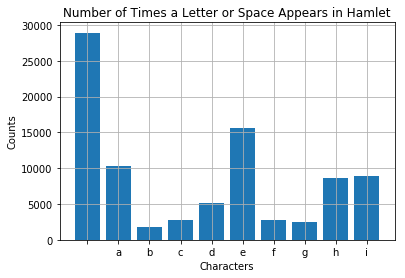

In [6]:
plt.bar(letters[:10],letters_counts[:10])
plt.grid('on')
plt.title('Number of Times a Letter or Space Appears in Hamlet')
plt.xlabel('Characters')
plt.ylabel('Counts')


The first couple of letters were plotted because that was the maximum number of letters to be able to be graphed on a single bar graph. But we are still able to see that letters are not evenly distributed. This is just explained from the fact that the english language uses different letters more often than others.

Now we will calculate the entropy of simplified hamlet. Entropy is the quantity describing the disorder of a system. It is defined by the equation:

$$  H = -\sum_{i=1}^n p_i \; log_2{p_i} = -\frac{1}{\ln 2} \,\sum_{i=1}^n p_i \; \ln{p_i} $$

In [7]:
probability_letter=[]
for values in letters_counts:
    probability_letter.append(values/length_hamlet)


In [8]:
def entropy(probability):
    """
    Parameters
    ----------
    
    Returns
    -------
    
    
    """
    H=0
    for p in probability:
        H=H+(p*np.log(p))
    H=H*(-1/(np.log(2)))
    return H

In [9]:
print(entropy(probability_letter))

4.113799509121935


We calculated the value of entropy to be 4.114 J/K. 

Now we will calculate the probability of randomly hitting keys to get us Hamlet. We will calculate this using the following equation:

\begin{equation}
Probability ={(\frac{Number\ of   Favorable\ Outcomes}{Total\ Number\ of\ Possible\ Outcomes})}^{Number of Favourable Outcomes}
\end{equation}


We will start by looking at the probability of typing hamlet if theres an equal chance to hit any given letter. In this case the $\frac{Number of Favourable Outcomes}{Total Number of Possible Outcomes}$ will be $\frac{1}{27}$ because for each letter there can be 27 possible outcomes.

An additional calculation we will do will be trying to figure out the number of different sequences for this case. Before actually calculating the value for $27^{163198}$. We can see that it will have a very large answer. So instead we calculate the answer using logerithims to get a more managable answer. We will do this by:

\begin{align*}
X &= 27^{163198} \\
log_{27}(x)&= 163198  \\
ln(x) &=  163198ln(27)  \\
\end{align*}

In [11]:


getcontext().prec = 6
even_probability=(Decimal(1)/(Decimal(len(letters))))**Decimal(length_hamlet)
print(even_probability)



even_sequences=length_hamlet*np.log(len(letters))
print(even_sequences)

1.68090E-233596
537873.9848581745


We found the probability to be $1.6809*10^{-233596}$ and the number of different sequences to be the $ln(x)=537873.94$

Now we will calculate the probability of typing hamlet if the chance of typing a letter follows the distribution of hamlet. In this case, the number of favourable outcomes is the number of times the letter shows up in hamlet and the total number of possible outcomes is the total letters in hamlet.

In [12]:
hamlet_probability=[]
getcontext().prec = 6
for values in probability_letter:
    hamlet_probability.append(Decimal(values)**Decimal(length_hamlet))
for i,j in zip(hamlet_probability,letters):
    print(j,i)

  4.04112E-122627
a 2.54045E-195942
b 2.17841E-318590
c 2.17478E-288237
d 3.42301E-245180
e 1.23449E-166105
f 1.01882E-289826
g 5.92973E-298298
h 7.59763E-207792
i 2.66241E-206316
j 9.64528E-516913
k 1.24344E-344226
l 1.13592E-229899
m 1.06705E-258110
n 1.58614E-207881
o 7.67384E-188162
p 1.15132E-311524
q 1.45706E-468749
r 3.60074E-214298
s 1.37843E-208077
t 2.68023E-182194
u 2.53975E-255125
v 7.09772E-346324
w 1.75706E-280307
x 3.31928E-485052
y 6.30729E-278495
z 7.67584E-508494


Now we will look at the probability of two letter combinations. This calculation is similar to the previous and just takes the probability of the previous individual letters and mulitiplies them together to get the probability of the joined two letter combination. Due to the large amount of letter combinations, only the combinations of the letter 'a' is shown.

In [13]:
data_probability={}
getcontext().prec = 6
for i,j in zip(hamlet_probability,letters):
    for k,l in zip(hamlet_probability,letters):
        data_probability[j+l]=i*k
for i in letters:
    print('a'+i,data_probability['a'+i])

a  1.02663E-318568
aa 6.45389E-391884
ab 5.53414E-514532
ac 5.52492E-484179
ad 8.69599E-441122
ae 3.13616E-362047
af 2.58826E-485768
ag 1.50642E-494239
ah 1.93014E-403733
ai 6.76372E-402258
aj 2.45034E-712854
ak 3.15890E-540168
al 2.88575E-425841
am 2.71079E-454052
an 4.02951E-403823
ao 1.94950E-384103
ap 2.92487E-507466
aq 3.70159E-664691
ar 9.14750E-410240
as 3.50183E-404019
at 6.80899E-378136
au 6.45211E-451067
av 1.80314E-542265
aw 4.46372E-476249
ax 8.43246E-680994
ay 1.60234E-474436
az 1.95001E-704435


When comparing the different probabilities, we can see that looking at the letters with the distribution of Hamlet vary. Some of the letters have both higher and lower probabilities than the uniform random selection of keys. This comes to also prove that some letters are more common in words than other. The two letter sequence had more probability values which were significantly lower and higher. This information helps to show word formation and what letters are used commonly together in words.


In [14]:
unique_two_words={}

book=Hamlet.split()

for position in range(len(book)-1):
    if book[position] in unique_two_words.keys():
        if book[position+1] not in unique_two_words[book[position]]:
            unique_two_words[book[position]].append(book[position+1])
    elif book[position] not in unique_two_words.keys():
        unique_two_words[book[position]]=[]



In [15]:
def determine_empty_list(list):
    """
    Parameters
    ----------
    
    Return
    """
    delete=[]
    for i in list:
        try:
            if len(list)<1:
                delete.append(i)
        except: pass
    return delete

delete_keys=determine_empty_list(unique_two_words)
while len(delete_keys) != 0:
    for values in delete_keys:
        del unique_two_words[values]
    delete_keys=determine_empty_list(unique_two_words)
        

In [16]:
word="ACT"
sentence=""
for i in range(100):
        sentence= sentence+' '+word
        search=unique_two_words[word]
        if len(search)>0:
            word=random.choice(search)
        else:
            while len(unique_two_words[word]) < 1:
                word=random.choice(list(unique_two_words))
  
print(sentence)

 ACT II SCENE VII. Another room of us, till that can it, Where it cannot play this favour and some vicious it? Do the issue of writ in many pocky here! [_Exit Hamlet Sits England was doubtful; like, if increase ’Swounds, show of gain-giving sure, yet ’tis most free souls, I beg it, Marcellus! Tell us so inoculate half sense. FIRST AMBASSADOR. hence tonight. Away, for me hear. GHOST. I know. KING. ’Tis dangerous when he in between them come here in us grant stole his faults in thee, good friends! How the fall to thyself: place. Danish dogs. home,


For the last section, we tried to create a sequence of text which sounded like hamlet. This was done by taking the words of hamlet and then figuring out what word comes after a specific word and using this information to create a text. 

We chose to look at the individual words as the same way we looked at letters previously. This is because using two letter words and trying to connect them using probability would cause a higher chance of creating nonsense. Also, we saw that when looking at the probabilities of two letter combinations we could see information about word formation. With the same thought process, we could look at words to show us information on sentence formation.

While choosing the next word, the first thought was to use the word with the highest probability to come next. This resulted in looping of words or sentences. So instead a list was made of the possible words which were to come next and a function which randomly chose out of the list was used.

After looking at the outcome, sentences don't always really make sense grammerically. This could be fixed through analysis of sentence structure like making sure there is the correct amount of noun's and verb's. Also being able to know the whether your writing in past tense or present tense. All these factors and more can help to make the sentences more grammerically correct.

# Conclusion

In this report we initially calculated the Entropy of a simplified version of Hamlet to be $4.11 J/K$. Following that probabilities were calculated for a Monkey to be able to recreate Hamlet for three cases. The first case was the probability for a uniform random selection of keys. The second was the probability using the distribution of hamlet which showed us that some letters are more prevelant in the english language. The third was the probability of two key combinations which showed us word formation. Finally we looked at creating a sequence of text which sounded like Hamlet. We approached using the same ideas in the previous questions but instead of seperating by letters, we serperated hamlet by words. Our outcome had grammerical errors but could be fixed through more analysis of sentence structure. 